# Getting Started



In [1]:
# Ensures that any methods/classes are reloaded if they are changed
%reload_ext autoreload
%autoreload 2

# Makes plots inline and higher resolution if using higher res monitors (uncomment second line otherwise)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [15]:
# Load dependencies
from fastai.vision import ImageDataBunch, cnn_learner, ClassificationInterpretation, get_transforms, imagenet_stats, ShowGraph
from fastai.metrics import error_rate
from fastai.metrics import roc_curve
from fastai.metrics import auc_roc_score
from fastai.metrics import accuracy
import matplotlib.pyplot as plt

In [4]:
# Download the data and unzip it
!wget https://github.com/kylebradbury/bc-tutorials/raw/master/data/kaggle_power_plants.zip -P data/

--2020-08-16 11:23:24--  https://github.com/kylebradbury/bc-tutorials/raw/master/data/kaggle_power_plants.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kylebradbury/bc-tutorials/master/data/kaggle_power_plants.zip [following]
--2020-08-16 11:23:24--  https://raw.githubusercontent.com/kylebradbury/bc-tutorials/master/data/kaggle_power_plants.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.128.133, 151.101.192.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.128.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44319469 (42M) [application/zip]
Saving to: ‘data/kaggle/kaggle_power_plants.zip’

kaggle_power_plants 100%[===================>]  42.27M  2.59MB/s    in 16s     

2020-08-16 11:23:40 (2.65 MB/s) - ‘data

In [5]:
!unzip data/kaggle_power_plants.zip -d data/kaggle/

Archive:  data/kaggle_power_plants.zip
   creating: data/kaggle/data/train/
  inflating: data/kaggle/data/__MACOSX/._train  
   creating: data/kaggle/data/train/solar/
   creating: data/kaggle/data/train/gas/
  inflating: data/kaggle/data/__MACOSX/train/._gas  
  inflating: data/kaggle/data/train/.DS_Store  
  inflating: data/kaggle/data/__MACOSX/train/._.DS_Store  
   creating: data/kaggle/data/train/nuclear/
  inflating: data/kaggle/data/__MACOSX/train/._nuclear  
   creating: data/kaggle/data/train/other/
   creating: data/kaggle/data/train/geothermal/
  inflating: data/kaggle/data/__MACOSX/train/._geothermal  
   creating: data/kaggle/data/train/wind/
   creating: data/kaggle/data/train/coal/
  inflating: data/kaggle/data/__MACOSX/train/._coal  
   creating: data/kaggle/data/train/biomass/
  inflating: data/kaggle/data/__MACOSX/train/._biomass  
   creating: data/kaggle/data/train/hydro/
  inflating: data/kaggle/data/__MACOSX/train/._hydro  
   creating: data/kaggle/data/train/oil/

  inflating: data/kaggle/data/train/solar/4946.tif  
  inflating: data/kaggle/data/train/solar/402.tif  
  inflating: data/kaggle/data/train/solar/1196.tif  
  inflating: data/kaggle/data/train/solar/5680.tif  
  inflating: data/kaggle/data/train/solar/600.tif  
  inflating: data/kaggle/data/train/solar/3583.tif  
  inflating: data/kaggle/data/train/solar/5694.tif  
  inflating: data/kaggle/data/train/solar/3554.tif  
  inflating: data/kaggle/data/train/solar/1431.tif  
  inflating: data/kaggle/data/train/solar/3568.tif  
  inflating: data/kaggle/data/train/solar/5092.tif  
  inflating: data/kaggle/data/train/solar/760.tif  
  inflating: data/kaggle/data/train/solar/947.tif  
  inflating: data/kaggle/data/train/solar/4818.tif  
  inflating: data/kaggle/data/train/solar/3622.tif  
  inflating: data/kaggle/data/train/solar/1035.tif  
  inflating: data/kaggle/data/train/solar/1747.tif  
  inflating: data/kaggle/data/train/solar/3636.tif  
  inflating: data/kaggle/data/train/solar/8039.tif

  inflating: data/kaggle/data/train/solar/5139.tif  
  inflating: data/kaggle/data/train/solar/3560.tif  
  inflating: data/kaggle/data/train/solar/5111.tif  
  inflating: data/kaggle/data/train/solar/5677.tif  
  inflating: data/kaggle/data/train/solar/5663.tif  
  inflating: data/kaggle/data/train/solar/5105.tif  
  inflating: data/kaggle/data/train/solar/634.tif  
  inflating: data/kaggle/data/train/solar/7538.tif  
  inflating: data/kaggle/data/train/solar/1607.tif  
  inflating: data/kaggle/data/train/solar/3799.tif  
  inflating: data/kaggle/data/train/solar/4790.tif  
  inflating: data/kaggle/data/train/solar/354.tif  
  inflating: data/kaggle/data/train/solar/6805.tif  
  inflating: data/kaggle/data/train/solar/426.tif  
  inflating: data/kaggle/data/train/solar/397.tif  
  inflating: data/kaggle/data/train/solar/383.tif  
  inflating: data/kaggle/data/train/solar/7931.tif  
  inflating: data/kaggle/data/train/solar/5698.tif  
  inflating: data/kaggle/data/train/solar/2134.tif 

  inflating: data/kaggle/data/train/solar/1700.tif  
  inflating: data/kaggle/data/train/solar/1701.tif  
  inflating: data/kaggle/data/train/solar/3664.tif  
  inflating: data/kaggle/data/train/solar/6907.tif  
  inflating: data/kaggle/data/train/solar/1932.tif  
  inflating: data/kaggle/data/train/solar/929.tif  
  inflating: data/kaggle/data/train/solar/7827.tif  
  inflating: data/kaggle/data/train/solar/7760.tif  
  inflating: data/kaggle/data/train/solar/5605.tif  
  inflating: data/kaggle/data/train/solar/691.tif  
  inflating: data/kaggle/data/train/solar/875.tif  
  inflating: data/kaggle/data/train/solar/652.tif  
  inflating: data/kaggle/data/train/solar/487.tif  
  inflating: data/kaggle/data/train/solar/2368.tif  
  inflating: data/kaggle/data/train/solar/2340.tif  
  inflating: data/kaggle/data/train/solar/1878.tif  
  inflating: data/kaggle/data/train/solar/1139.tif  
  inflating: data/kaggle/data/train/solar/3706.tif  
  inflating: data/kaggle/data/train/solar/650.tif  

  inflating: data/kaggle/data/__MACOSX/train/gas/._1241.tif  
  inflating: data/kaggle/data/train/gas/702.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._702.tif  
  inflating: data/kaggle/data/train/gas/5609.tif  
  inflating: data/kaggle/data/train/gas/851.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._851.tif  
  inflating: data/kaggle/data/train/gas/5635.tif  
  inflating: data/kaggle/data/train/gas/3522.tif  
  inflating: data/kaggle/data/train/gas/3536.tif  
  inflating: data/kaggle/data/train/gas/1447.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._1447.tif  
  inflating: data/kaggle/data/train/gas/2364.tif  
  inflating: data/kaggle/data/train/gas/7546.tif  
  inflating: data/kaggle/data/train/gas/7552.tif  
  inflating: data/kaggle/data/train/gas/3091.tif  
  inflating: data/kaggle/data/train/gas/7595.tif  
  inflating: data/kaggle/data/train/gas/4063.tif  
  inflating: data/kaggle/data/train/gas/4711.tif  
  inflating: data/kaggle/data/train/gas/89

  inflating: data/kaggle/data/train/gas/2306.tif  
  inflating: data/kaggle/data/train/gas/3018.tif  
  inflating: data/kaggle/data/train/gas/1394.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._1394.tif  
  inflating: data/kaggle/data/train/gas/7901.tif  
  inflating: data/kaggle/data/train/gas/3232.tif  
  inflating: data/kaggle/data/train/gas/5643.tif  
  inflating: data/kaggle/data/train/gas/7726.tif  
  inflating: data/kaggle/data/train/gas/4213.tif  
  inflating: data/kaggle/data/train/gas/199.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._199.tif  
  inflating: data/kaggle/data/train/gas/774.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._774.tif  
  inflating: data/kaggle/data/train/gas/4398.tif  
  inflating: data/kaggle/data/train/gas/2931.tif  
  inflating: data/kaggle/data/train/gas/3391.tif  
  inflating: data/kaggle/data/train/gas/7652.tif  
  inflating: data/kaggle/data/train/gas/4415.tif  
  inflating: data/kaggle/data/train/gas/6570.tif  
  

  inflating: data/kaggle/data/train/gas/781.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._781.tif  
  inflating: data/kaggle/data/train/gas/3364.tif  
  inflating: data/kaggle/data/train/gas/7880.tif  
  inflating: data/kaggle/data/train/gas/7658.tif  
  inflating: data/kaggle/data/train/gas/1942.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._1942.tif  
  inflating: data/kaggle/data/train/gas/3827.tif  
  inflating: data/kaggle/data/train/gas/7466.tif  
  inflating: data/kaggle/data/train/gas/1017.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._1017.tif  
  inflating: data/kaggle/data/train/gas/2536.tif  
  inflating: data/kaggle/data/train/gas/4621.tif  
  inflating: data/kaggle/data/train/gas/6022.tif  
  inflating: data/kaggle/data/train/gas/7315.tif  
  inflating: data/kaggle/data/train/gas/3826.tif  
  inflating: data/kaggle/data/train/gas/569.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._569.tif  
  inflating: data/kaggle/data/train/gas/27

  inflating: data/kaggle/data/__MACOSX/train/gas/._1831.tif  
  inflating: data/kaggle/data/train/gas/431.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._431.tif  
  inflating: data/kaggle/data/train/gas/1172.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._1172.tif  
  inflating: data/kaggle/data/train/gas/1166.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._1166.tif  
  inflating: data/kaggle/data/train/gas/5466.tif  
  inflating: data/kaggle/data/train/gas/4591.tif  
  inflating: data/kaggle/data/train/gas/169.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._169.tif  
  inflating: data/kaggle/data/train/gas/6423.tif  
  inflating: data/kaggle/data/train/gas/5894.tif  
  inflating: data/kaggle/data/train/gas/5880.tif  
  inflating: data/kaggle/data/train/gas/7729.tif  
  inflating: data/kaggle/data/train/gas/7701.tif  
  inflating: data/kaggle/data/train/gas/1370.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._1370.tif  
  inflating: data/ka

  inflating: data/kaggle/data/train/gas/247.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._247.tif  
  inflating: data/kaggle/data/train/gas/5984.tif  
  inflating: data/kaggle/data/train/gas/2999.tif  
  inflating: data/kaggle/data/train/gas/3311.tif  
  inflating: data/kaggle/data/train/gas/7605.tif  
  inflating: data/kaggle/data/train/gas/7163.tif  
  inflating: data/kaggle/data/train/gas/3488.tif  
  inflating: data/kaggle/data/train/gas/737.tif  
  inflating: data/kaggle/data/__MACOSX/train/gas/._737.tif  
  inflating: data/kaggle/data/train/gas/2966.tif  
  inflating: data/kaggle/data/train/gas/6447.tif  
  inflating: data/kaggle/data/train/gas/8318.tif  
  inflating: data/kaggle/data/train/gas/3503.tif  
  inflating: data/kaggle/data/train/gas/5172.tif  
  inflating: data/kaggle/data/train/gas/3517.tif  
  inflating: data/kaggle/data/train/gas/7771.tif  
  inflating: data/kaggle/data/train/gas/5600.tif  
  inflating: data/kaggle/data/train/gas/2396.tif  
  inflating: 

  inflating: data/kaggle/data/train/other/2984.tif  
  inflating: data/kaggle/data/train/other/316.tif  
  inflating: data/kaggle/data/train/other/935.tif  
  inflating: data/kaggle/data/train/other/2942.tif  
  inflating: data/kaggle/data/train/other/6994.tif  
  inflating: data/kaggle/data/train/other/6429.tif  
  inflating: data/kaggle/data/train/other/6833.tif  
  inflating: data/kaggle/data/train/other/2880.tif  
  inflating: data/kaggle/data/train/other/6577.tif  
  inflating: data/kaggle/data/train/other/1620.tif  
  inflating: data/kaggle/data/train/other/7512.tif  
  inflating: data/kaggle/data/train/other/2046.tif  
  inflating: data/kaggle/data/train/other/8393.tif  
  inflating: data/kaggle/data/train/other/3991.tif  
  inflating: data/kaggle/data/train/other/4754.tif  
  inflating: data/kaggle/data/train/other/7288.tif  
  inflating: data/kaggle/data/train/other/5689.tif  
  inflating: data/kaggle/data/train/other/5138.tif  
  inflating: data/kaggle/data/train/other/7699.t

  inflating: data/kaggle/data/train/wind/1904.tif  
  inflating: data/kaggle/data/train/wind/7622.tif  
  inflating: data/kaggle/data/train/wind/664.tif  
  inflating: data/kaggle/data/train/wind/4288.tif  
  inflating: data/kaggle/data/train/wind/3040.tif  
  inflating: data/kaggle/data/train/wind/1858.tif  
  inflating: data/kaggle/data/train/wind/3083.tif  
  inflating: data/kaggle/data/train/wind/7282.tif  
  inflating: data/kaggle/data/train/wind/5495.tif  
  inflating: data/kaggle/data/train/wind/6188.tif  
  inflating: data/kaggle/data/train/wind/415.tif  
  inflating: data/kaggle/data/train/wind/1803.tif  
  inflating: data/kaggle/data/train/wind/1630.tif  
  inflating: data/kaggle/data/train/wind/2649.tif  
  inflating: data/kaggle/data/train/wind/7719.tif  
  inflating: data/kaggle/data/train/wind/4204.tif  
  inflating: data/kaggle/data/train/wind/6759.tif  
  inflating: data/kaggle/data/train/wind/1751.tif  
  inflating: data/kaggle/data/train/wind/6980.tif  
  inflating: d

  inflating: data/kaggle/data/train/wind/6861.tif  
  inflating: data/kaggle/data/train/wind/6650.tif  
  inflating: data/kaggle/data/train/wind/4735.tif  
  inflating: data/kaggle/data/train/wind/4279.tif  
  inflating: data/kaggle/data/train/wind/3258.tif  
  inflating: data/kaggle/data/train/wind/865.tif  
  inflating: data/kaggle/data/train/wind/722.tif  
  inflating: data/kaggle/data/train/wind/3310.tif  
  inflating: data/kaggle/data/train/wind/4319.tif  
  inflating: data/kaggle/data/train/wind/7361.tif  
  inflating: data/kaggle/data/train/wind/4324.tif  
  inflating: data/kaggle/data/train/wind/4456.tif  
  inflating: data/kaggle/data/train/wind/4318.tif  
  inflating: data/kaggle/data/train/wind/1512.tif  
  inflating: data/kaggle/data/train/wind/2972.tif  
  inflating: data/kaggle/data/train/wind/723.tif  
  inflating: data/kaggle/data/train/wind/2621.tif  
  inflating: data/kaggle/data/train/wind/4278.tif  
  inflating: data/kaggle/data/train/wind/8126.tif  
  inflating: da

  inflating: data/kaggle/data/train/coal/5425.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._5425.tif  
  inflating: data/kaggle/data/train/coal/314.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._314.tif  
  inflating: data/kaggle/data/train/coal/171.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._171.tif  
  inflating: data/kaggle/data/train/coal/4576.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._4576.tif  
  inflating: data/kaggle/data/train/coal/2932.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._2932.tif  
  inflating: data/kaggle/data/train/coal/6229.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._6229.tif  
  inflating: data/kaggle/data/train/coal/7889.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._7889.tif  
  inflating: data/kaggle/data/train/coal/2073.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._2073.tif  
  inflating: data/kaggle/data/train/coal/7679.tif  
  inflating: data/kaggle/data/__

  inflating: data/kaggle/data/train/coal/2870.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._2870.tif  
  inflating: data/kaggle/data/train/coal/2125.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._2125.tif  
  inflating: data/kaggle/data/train/coal/7854.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._7854.tif  
  inflating: data/kaggle/data/train/coal/7101.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._7101.tif  
  inflating: data/kaggle/data/train/coal/4346.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._4346.tif  
  inflating: data/kaggle/data/train/coal/7841.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._7841.tif  
  inflating: data/kaggle/data/train/coal/6418.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._6418.tif  
  inflating: data/kaggle/data/train/coal/8384.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._8384.tif  
  inflating: data/kaggle/data/train/coal/2332.tif  
  inflating: data/kaggle/dat

  inflating: data/kaggle/data/__MACOSX/train/coal/._478.tif  
  inflating: data/kaggle/data/train/coal/4055.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._4055.tif  
  inflating: data/kaggle/data/train/coal/4727.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._4727.tif  
  inflating: data/kaggle/data/train/coal/1887.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._1887.tif  
  inflating: data/kaggle/data/train/coal/7428.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._7428.tif  
  inflating: data/kaggle/data/train/coal/3100.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._3100.tif  
  inflating: data/kaggle/data/train/coal/7401.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._7401.tif  
  inflating: data/kaggle/data/train/coal/7617.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._7617.tif  
  inflating: data/kaggle/data/train/coal/5362.tif  
  inflating: data/kaggle/data/__MACOSX/train/coal/._5362.tif  
  inflating: data/

  inflating: data/kaggle/data/__MACOSX/train/biomass/._1234.tif  
  inflating: data/kaggle/data/train/biomass/6201.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._6201.tif  
  inflating: data/kaggle/data/train/biomass/2067.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._2067.tif  
  inflating: data/kaggle/data/train/biomass/4199.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._4199.tif  
  inflating: data/kaggle/data/train/biomass/1744.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._1744.tif  
  inflating: data/kaggle/data/train/biomass/2259.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._2259.tif  
  inflating: data/kaggle/data/train/biomass/8211.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._8211.tif  
  inflating: data/kaggle/data/train/biomass/2728.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._2728.tif  
  inflating: data/kaggle/data/train/biomass/7863.tif  
  inflating: data/kaggle/data/__

  inflating: data/kaggle/data/train/biomass/7100.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._7100.tif  
  inflating: data/kaggle/data/train/biomass/768.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._768.tif  
  inflating: data/kaggle/data/train/biomass/2124.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._2124.tif  
  inflating: data/kaggle/data/train/biomass/3212.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._3212.tif  
  inflating: data/kaggle/data/train/biomass/7921.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._7921.tif  
  inflating: data/kaggle/data/train/biomass/6632.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._6632.tif  
  inflating: data/kaggle/data/train/biomass/8151.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._8151.tif  
  inflating: data/kaggle/data/train/biomass/1818.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._1818.tif  
  inflating: data/kaggle/data/trai

  inflating: data/kaggle/data/__MACOSX/train/biomass/._2184.tif  
  inflating: data/kaggle/data/train/biomass/7942.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._7942.tif  
  inflating: data/kaggle/data/train/biomass/2345.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._2345.tif  
  inflating: data/kaggle/data/train/biomass/1102.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._1102.tif  
  inflating: data/kaggle/data/train/biomass/4095.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._4095.tif  
  inflating: data/kaggle/data/train/biomass/8268.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._8268.tif  
  inflating: data/kaggle/data/train/biomass/5994.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._5994.tif  
  inflating: data/kaggle/data/train/biomass/2745.tif  
  inflating: data/kaggle/data/__MACOSX/train/biomass/._2745.tif  
  inflating: data/kaggle/data/train/biomass/5980.tif  
  inflating: data/kaggle/data/__

  inflating: data/kaggle/data/train/hydro/3914.tif  
  inflating: data/kaggle/data/train/hydro/7596.tif  
  inflating: data/kaggle/data/train/hydro/2363.tif  
  inflating: data/kaggle/data/train/hydro/1656.tif  
  inflating: data/kaggle/data/train/hydro/2808.tif  
  inflating: data/kaggle/data/train/hydro/2820.tif  
  inflating: data/kaggle/data/train/hydro/7780.tif  
  inflating: data/kaggle/data/train/hydro/7743.tif  
  inflating: data/kaggle/data/train/hydro/5154.tif  
  inflating: data/kaggle/data/train/hydro/8289.tif  
  inflating: data/kaggle/data/train/hydro/5949.tif  
  inflating: data/kaggle/data/train/hydro/3690.tif  
  inflating: data/kaggle/data/train/hydro/261.tif  
  inflating: data/kaggle/data/train/hydro/8061.tif  
  inflating: data/kaggle/data/train/hydro/260.tif  
  inflating: data/kaggle/data/train/hydro/2772.tif  
  inflating: data/kaggle/data/train/hydro/7187.tif  
  inflating: data/kaggle/data/train/hydro/7193.tif  
  inflating: data/kaggle/data/train/hydro/2821.t

  inflating: data/kaggle/data/train/hydro/8019.tif  
  inflating: data/kaggle/data/train/hydro/5529.tif  
  inflating: data/kaggle/data/train/hydro/6020.tif  
  inflating: data/kaggle/data/train/hydro/595.tif  
  inflating: data/kaggle/data/train/hydro/1015.tif  
  inflating: data/kaggle/data/train/hydro/581.tif  
  inflating: data/kaggle/data/train/hydro/218.tif  
  inflating: data/kaggle/data/train/hydro/542.tif  
  inflating: data/kaggle/data/train/hydro/2736.tif  
  inflating: data/kaggle/data/train/hydro/3428.tif  
  inflating: data/kaggle/data/train/hydro/7114.tif  
  inflating: data/kaggle/data/train/hydro/4555.tif  
  inflating: data/kaggle/data/train/hydro/2859.tif  
  inflating: data/kaggle/data/train/hydro/4757.tif  
  inflating: data/kaggle/data/train/hydro/3986.tif  
  inflating: data/kaggle/data/train/hydro/387.tif  
  inflating: data/kaggle/data/train/hydro/3951.tif  
  inflating: data/kaggle/data/train/hydro/3941.tif  
  inflating: data/kaggle/data/train/hydro/4948.tif 

  inflating: data/kaggle/data/train/hydro/1107.tif  
  inflating: data/kaggle/data/train/hydro/2383.tif  
  inflating: data/kaggle/data/train/hydro/3937.tif  
  inflating: data/kaggle/data/train/hydro/3921.tif  
  inflating: data/kaggle/data/train/hydro/7206.tif  
  inflating: data/kaggle/data/train/hydro/8121.tif  
  inflating: data/kaggle/data/train/hydro/2829.tif  
  inflating: data/kaggle/data/train/hydro/7986.tif  
  inflating: data/kaggle/data/train/hydro/8337.tif  
  inflating: data/kaggle/data/train/hydro/5613.tif  
  inflating: data/kaggle/data/train/hydro/7762.tif  
  inflating: data/kaggle/data/train/hydro/7776.tif  
  inflating: data/kaggle/data/train/hydro/6285.tif  
  inflating: data/kaggle/data/train/hydro/2752.tif  
  inflating: data/kaggle/data/train/hydro/240.tif  
  inflating: data/kaggle/data/train/hydro/4653.tif  
  inflating: data/kaggle/data/train/hydro/8069.tif  
  inflating: data/kaggle/data/train/hydro/1703.tif  
  inflating: data/kaggle/data/train/hydro/3667.

  inflating: data/kaggle/data/train/oil/4579.tif  
  inflating: data/kaggle/data/train/oil/5673.tif  
  inflating: data/kaggle/data/train/oil/546.tif  
  inflating: data/kaggle/data/train/oil/4633.tif  
  inflating: data/kaggle/data/train/oil/2519.tif  
  inflating: data/kaggle/data/train/oil/1992.tif  
  inflating: data/kaggle/data/train/oil/3377.tif  
  inflating: data/kaggle/data/train/oil/3363.tif  
  inflating: data/kaggle/data/train/oil/8236.tif  
  inflating: data/kaggle/data/train/oil/7878.tif  
  inflating: data/kaggle/data/train/oil/2490.tif  
  inflating: data/kaggle/data/train/oil/343.tif  
  inflating: data/kaggle/data/train/oil/2645.tif  
  inflating: data/kaggle/data/train/oil/1984.tif  
  inflating: data/kaggle/data/train/oil/1990.tif  
  inflating: data/kaggle/data/train/oil/2241.tif  
  inflating: data/kaggle/data/train/oil/5513.tif  
  inflating: data/kaggle/data/train/oil/6218.tif  
  inflating: data/kaggle/data/train/oil/7648.tif  
  inflating: data/kaggle/data/tra

  inflating: data/kaggle/data/valid/solar/1826.tif  
  inflating: data/kaggle/data/valid/solar/2384.tif  
  inflating: data/kaggle/data/valid/solar/494.tif  
  inflating: data/kaggle/data/valid/solar/5825.tif  
  inflating: data/kaggle/data/valid/solar/1470.tif  
  inflating: data/kaggle/data/valid/solar/286.tif  
  inflating: data/kaggle/data/valid/solar/293.tif  
  inflating: data/kaggle/data/valid/solar/907.tif  
  inflating: data/kaggle/data/valid/solar/1303.tif  
  inflating: data/kaggle/data/valid/solar/1897.tif  
  inflating: data/kaggle/data/valid/solar/7564.tif  
  inflating: data/kaggle/data/valid/solar/1473.tif  
  inflating: data/kaggle/data/valid/solar/859.tif  
  inflating: data/kaggle/data/valid/solar/5629.tif  
  inflating: data/kaggle/data/valid/solar/2032.tif  
  inflating: data/kaggle/data/valid/solar/8053.tif  
  inflating: data/kaggle/data/valid/solar/1739.tif  
  inflating: data/kaggle/data/valid/solar/1937.tif  
  inflating: data/kaggle/data/valid/solar/910.tif  

  inflating: data/kaggle/data/valid/gas/5923.tif  
  inflating: data/kaggle/data/valid/gas/2043.tif  
  inflating: data/kaggle/data/valid/gas/1204.tif  
  inflating: data/kaggle/data/valid/gas/4433.tif  
  inflating: data/kaggle/data/valid/gas/7847.tif  
  inflating: data/kaggle/data/valid/gas/8194.tif  
  inflating: data/kaggle/data/valid/gas/424.tif  
  inflating: data/kaggle/data/valid/gas/5945.tif  
  inflating: data/kaggle/data/valid/gas/3461.tif  
  inflating: data/kaggle/data/valid/gas/4681.tif  
  inflating: data/kaggle/data/valid/gas/2555.tif  
  inflating: data/kaggle/data/valid/gas/5549.tif  
  inflating: data/kaggle/data/valid/gas/6524.tif  
  inflating: data/kaggle/data/valid/gas/3474.tif  
  inflating: data/kaggle/data/valid/gas/5978.tif  
  inflating: data/kaggle/data/valid/gas/2178.tif  
  inflating: data/kaggle/data/valid/gas/7599.tif  
  inflating: data/kaggle/data/valid/gas/3099.tif  
  inflating: data/kaggle/data/valid/gas/3489.tif  
  inflating: data/kaggle/data/va

  inflating: data/kaggle/data/valid/coal/4639.tif  
  inflating: data/kaggle/data/valid/coal/4638.tif  
  inflating: data/kaggle/data/valid/coal/3157.tif  
  inflating: data/kaggle/data/valid/coal/1813.tif  
  inflating: data/kaggle/data/valid/coal/2090.tif  
  inflating: data/kaggle/data/valid/coal/151.tif  
  inflating: data/kaggle/data/valid/coal/345.tif  
  inflating: data/kaggle/data/valid/coal/4811.tif  
  inflating: data/kaggle/data/valid/coal/3159.tif  
  inflating: data/kaggle/data/valid/coal/7712.tif  
  inflating: data/kaggle/data/valid/coal/4019.tif  
  inflating: data/kaggle/data/valid/coal/6811.tif  
  inflating: data/kaggle/data/valid/coal/8342.tif  
  inflating: data/kaggle/data/valid/coal/5316.tif  
  inflating: data/kaggle/data/valid/coal/2692.tif  
  inflating: data/kaggle/data/valid/coal/3229.tif  
  inflating: data/kaggle/data/valid/coal/4618.tif  
  inflating: data/kaggle/data/valid/coal/5063.tif  
  inflating: data/kaggle/data/valid/coal/8396.tif  
  inflating: d

  inflating: data/kaggle/data/valid/hydro/8228.tif  
  inflating: data/kaggle/data/valid/hydro/7866.tif  
  inflating: data/kaggle/data/valid/hydro/2856.tif  
  inflating: data/kaggle/data/valid/hydro/3962.tif  
  inflating: data/kaggle/data/valid/hydro/8153.tif  
  inflating: data/kaggle/data/valid/hydro/391.tif  
  inflating: data/kaggle/data/valid/hydro/7937.tif  
  inflating: data/kaggle/data/valid/hydro/2734.tif  
  inflating: data/kaggle/data/valid/hydro/6778.tif  
  inflating: data/kaggle/data/valid/hydro/743.tif  
  inflating: data/kaggle/data/valid/hydro/7077.tif  
  inflating: data/kaggle/data/valid/hydro/3952.tif  
  inflating: data/kaggle/data/valid/hydro/8185.tif  
  inflating: data/kaggle/data/valid/hydro/8187.tif  
  inflating: data/kaggle/data/valid/hydro/3788.tif  
  inflating: data/kaggle/data/valid/hydro/7061.tif  
  inflating: data/kaggle/data/valid/hydro/6545.tif  
  inflating: data/kaggle/data/valid/hydro/225.tif  
  inflating: data/kaggle/data/valid/hydro/3617.ti

In [9]:
path = 'data/kaggle/'

In [11]:
bs = 15

In [12]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=101, bs=bs).normalize(imagenet_stats)

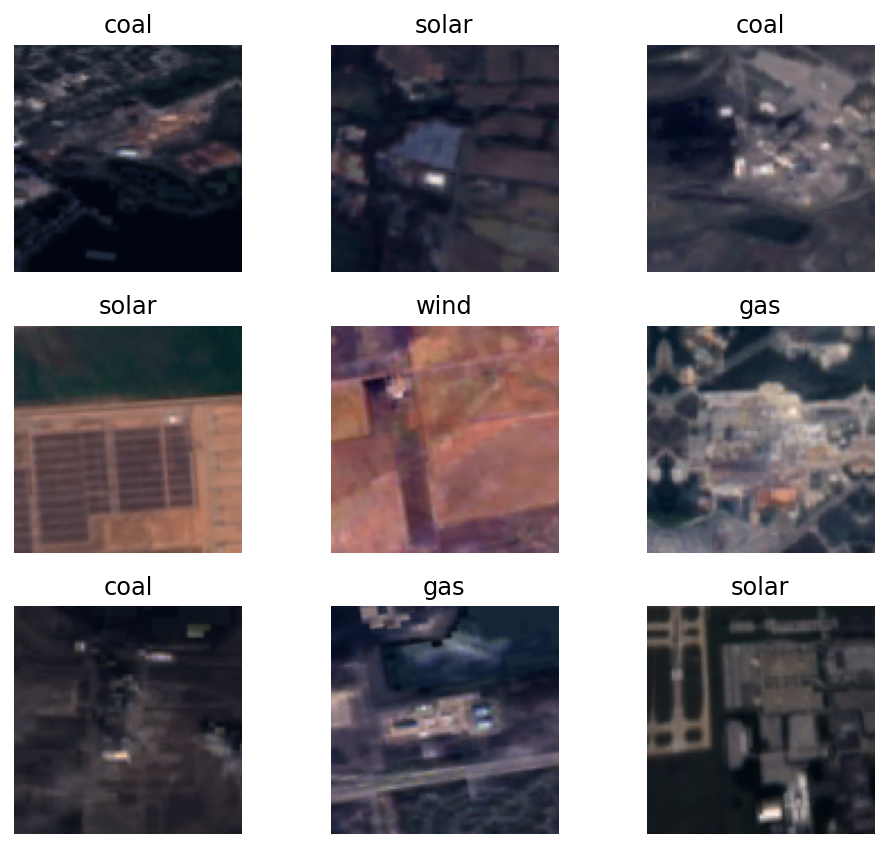

In [13]:
data.show_batch(rows=3, figsize=(7,6))

In [14]:
print(data.classes)

['biomass', 'coal', 'gas', 'geothermal', 'hydro', 'nuclear', 'oil', 'other', 'solar', 'wind']


In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy, callback_fns=ShowGraph, pretrained=True)

In [ ]:
learn.unfreeze()

In [ ]:
learn.save('resnet34')

In [ ]:
preds = learn.get_preds(with_loss=True)
# roc = roc_curve(preds[0][:,1],preds[1])
# auc = auc_roc_score(preds[0][:,1],preds[1])

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(16, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=120)

In [ ]:
interp.most_confused(min_val=2)